# Lab 3: Population genetics and GWAS


## Part 2 (40 pts)

Skills covered: GWAS, plink, p-values, plotting

In this exercise we will perform a GWAS of a quantitative trait (LDL cholesterol), and explore effects of confounding by ancestry.

We have prepared a dataset consisting of a subset of individuals from the 1000 Genomes Project dataset, and have LD-pruned SNPs so you have a more manageable dataset size to work with. In the lab3 data directory `~/public/lab3/` you'll find:

* `lab3_gwas.phen`: Normalized LDL values for each sample
* `lab3_gwas.vcf.gz`: A VCF file containing the LD-pruned SNPs for a subset of the 1000 Genomes samples
* `lab3_gwas.vcf.gz.tbi`: The VCF file index

(*Note: we simulated the phenotype info. This info is not actually available for 1000 Genomes samples.)

For this part of the lab, we will have a simplified format where there is just one cell where you'll put all of your answers, and fewer step by step instructions. This is in preparation for the more open-ended lab format starting next week.

<font color="red">The plotting cells below assume the output files of your plink commands are in the same directory as this notebook. You can either run your commands in this directory, or copy the necessary results files here. If you've done everything correctly you should see nice Manhattan and QQ plots.</font>

### Setup

1. The plotting cells below use the qqman python package. We have not installed this for you. You can install it locally with:

```shell
pip install --user qqman
```

2. Before we get started, it is always a good idea to do some basic checks on our data. The cell below plots a distribution of the phenotype values, and also prints out some basic summary statistics about the number of samples and variants in our dataset.

Populating the interactive namespace from numpy and matplotlib
Found 207 samples in VCF file
Of those, 207 samples have phenotype values
Found this many total variants:
917845


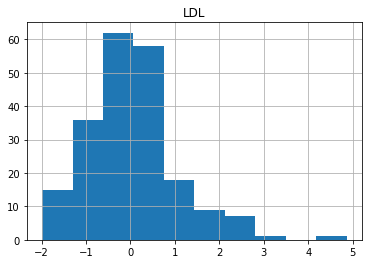

In [1]:
"""
Run this cell to get some basic metadata about the files
being used for your GWAS.
There are no points associated with this cell.
"""
%pylab inline
import os
import pandas as pd

# Plot histogram of LDL values. Should be a nice bell shaped curve
ptdata = pd.read_csv(os.environ["HOME"]+"/public/lab3/lab3_gwas.phen", delim_whitespace=True, \
                    names=["FID","IID","LDL"])
ptdata.hist("LDL");

# Print out sample info
import vcf
reader = vcf.Reader(open(os.environ["HOME"]+"/public/lab3/lab3_gwas.vcf.gz", "rb"))
print("Found {numsamp} samples in VCF file".format(numsamp=len(reader.samples)))
numsamp_withpt = len(set(ptdata["IID"]).intersection(set(reader.samples)))
print("Of those, {numsamp} samples have phenotype values".format(numsamp=numsamp_withpt))

# Print out variant info
print("Found this many total variants:")
!bcftools index -n ~/public/lab3/lab3_gwas.vcf.gz 

### Exercises

**Question 1 (10 pts):** Use plink to perform a GWAS using the [--linear](https://www.cog-genomics.org/plink/1.9/assoc#linear) option. To save time, you can use `--maf 0.05` to restrict to common SNPs. Set `--out lab3_gwas`, which will create a file `lab3_gwas.assoc.linear`. If your GWAS was successful, the cell below labeled "Question 1" should output a Manhattan plot and QQ plot.

* Paste your command in `q1_cmd` below.  
* Take a look at the output file. What p-value did you get for SNP rs7917054? Set `q1_pval` to your answer below.

How does the QQ plot look? You should see severely inflated p-values, which is good evidence that there is some confounding factor we're not controlling for.

**Question 2 (7 pts):** A common source of confounding in GWAS is due to population structure. Perform a PCA on the genotypes using plink. Only compute the top 3 PCs (`--pca 3`). Use `--out lab3_gwas`, which will create a file `lab3_gwas.eigenvec`. If your PCA was successful, the cell below labeled "Question 2" should output a scatter plot of PC1 vs. PC2.

* Paste your command in `q2_cmd` below.
* How many major population clusters do you see? Set `q2_numpop` to your answer below. (You might see some outlier points. don't count those as clusters).

**Question 3 (12 pts):** Rerun your GWAS from 2.1, but this time controlling for population structure by including the top 3 PCs as covariates. For this, you can use the `--covar` option of plink. Note, you can also use the `hide-covar` modifier to make sure plink only outputs p-values for the SNP effects (`--linear hide-covar`). Otherwise, it will also output p-values for each covariate. Use `--out lab3_gwas_covar` which will create a file `lab3_gwas_covar.assoc.linear`. If your GWAS was successful, the cell below labeled "Question 3" should output a Manhattan plot and QQ plot. You should see the p-values are far less inflated now. 

* Paste your command in `q3_cmd` below.
* How many SNPs passed genome-wide significance? ($p<5*10^{-8}$)?. Set `q3_numsig` to your answer below.

**Question 4 (11 pts):** Finally, let's perform "clumping" to identify individual hits. You can use the plink `--clump` option to do this. It will take in a VCF file (or other genotypes format), and the association statistics computed above, and output a list of independent signals. Read more about clumping [here](https://www.cog-genomics.org/plink/1.9/postproc#clump).

* Paste any commands you used to perform clumping on your results in `q4_cmd` below. Note, we also had to run an extra step to remove duplicate SNP ids. There are multiple ways to do that. We used `bcftools norm`.
* How many clumps did you find with a lead p-value $<5*10^{-8}$? Set `q4_numclumps` to your answer below.
* What chromosome is the top clump on? Set `q4_topclump_chrom` to your answer below.

Do any of your hits correspond to previously published GWAS loci for LDL? e.g. see [here](https://bmcmedgenet.biomedcentral.com/articles/10.1186/1471-2350-12-131/figures/3)

In [1]:
# Import libraries
%pylab inline
import os
import pandas as pd
from qqman import qqman

""" Paste your answers for questions below """

q1_cmd = """
# Paste your command for running a GWAS here
"""

q1_pval = -1 # Set to your pvalue for the SNP rs7917054

q2_cmd = """
# Paste your command for running PCA here
"""

q2_numpop = 0 # Set to the number of population clusters

q3_cmd = """
# Paste your command for running GWAS with PCs as covariates here
"""

q3_numsig = -1 # set to the number of genome-wide significant SNPs

q4_cmd = """
# Paste your command(s) for clumping here
"""

q4_numclumps = -1 # Set to the number of clumps you found

q4_topclump_chrom = "" # Set to the chromosome number of the top clump. e.g. "1", "2", "3", etc.

# your code here
q1_cmd = """
plink --vcf ~/public/lab3/lab3_gwas.vcf.gz --pheno ~/public/lab3/lab3_gwas.phen --linear --maf 0.05--out lab3_gwas --allow-no-sex
"""
q1_pval = 0.5471
q2_cmd = """
plink --vcf ~/public/lab3/lab3_gwas.vcf.gz --pca 3 --out lab3_gwas
"""
q2_numpop = 2

q3_cmd = """
plink --vcf ~/public/lab3/lab3_gwas.vcf.gz \
      --pheno ~/public/lab3/lab3_gwas.phen \
      --covar ~/lab3/lab3_gwas.eigenvec \
      --linear hide-covar \
      --allow-no-sex \
      --maf 0.05 \
      --out lab3_gwas_covar
"""
q3_numsig = 8
q4_cmd = """
bcftools norm --rm-dup all -o ~/lab3/lab3_gwas_nodup.vcf.gz ~/public/lab3/lab3_gwas.vcf.gz 
plink --vcf ~/lab3/lab3_gwas_nodup.vcf.gz --clump lab3_gwas_covar.assoc.linear --clump-p1 5e-8 --out lab3_gwas_clumped
"""
q4_numclumps = 3
q4_topclump_chrom = "19"
# raise NotImplementedError

Populating the interactive namespace from numpy and matplotlib


In [9]:
"""Basic check on plink --linear command and output"""
import os
assert("plink" in q1_cmd)
assert("--linear" in q1_cmd)
assert("--out" in q1_cmd)
assert("--maf" in q1_cmd)
assert("lab3_gwas.assoc.linear" in os.listdir("."))

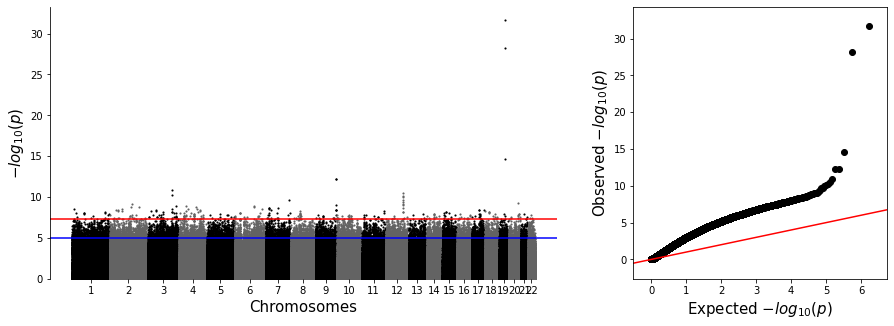

In [10]:
"""Question 1: Make Manhattan and QQ plot of the results"""
from qqman import qqman
data = pd.read_csv("lab3_gwas.assoc.linear", delim_whitespace=True)
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.set_size_inches((15, 5))
qqman.manhattan(data, ax=ax0)
qqman.qqplot(data, ax=ax1)

In [11]:
"""Check p-value for example SNP"""
assert(q1_pval > 0 and q1_pval < 1)
# Hidden tests check actual answer

In [15]:
"""Basic check on plink --pca command and output"""
assert("plink" in q2_cmd)
assert("--pca" in q2_cmd)
assert("--out" in q2_cmd)
assert("lab3_gwas.eigenvec" in os.listdir("."))

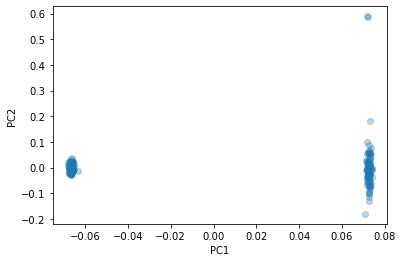

In [16]:
"""Question 2: Plot the top PCs of our results"""
pca = pd.read_csv("lab3_gwas.eigenvec", delim_whitespace=True, header=None)
pca.columns = ["sample","sample2"]+["PC%s"%i for i in range(1, 4)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(pca["PC1"], pca["PC2"], alpha=0.3);
ax.set_xlabel("PC1")
ax.set_ylabel("PC2");

In [19]:
"""Check num PCA clusters"""
assert(q2_numpop > 0 and q2_numpop < 10)
# Hidden tests check actual value

In [22]:
"""Basic check on plink --linear and --covar command and output"""
import os
assert("plink" in q3_cmd)
assert("--linear" in q3_cmd)
assert("--covar" in q3_cmd)
assert("--out" in q3_cmd)
assert("--maf" in q3_cmd)
assert("lab3_gwas_covar.assoc.linear" in os.listdir("."))

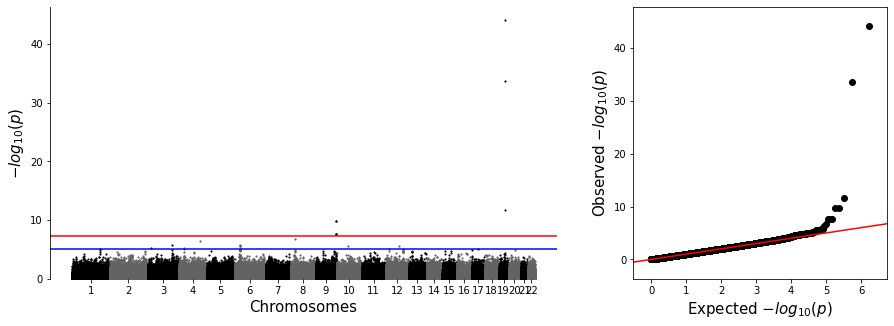

In [23]:
"""Question 3: Make Manhattan and QQ plot of the results - w/covars"""
covdata = pd.read_csv("lab3_gwas_covar.assoc.linear", delim_whitespace=True)
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]})
fig.set_size_inches((15, 5))
qqman.manhattan(covdata, ax=ax0)
qqman.qqplot(covdata, ax=ax1)

In [2]:
"""Check num sig hits"""
assert(q3_numsig >= 0)

In [3]:
"""Basic check on clumping commands"""
assert("plink" in q4_cmd)
assert("--clump" in q4_cmd)

In [4]:
"""Check clump number"""
assert(q4_numclumps > 0)

In [5]:
"""Check chrom of top clump"""
assert(q4_topclump_chrom in [str(i) for i in range(1, 23)])